# K-Means Color Quantization
Reduces the number of distinct colors in an image.

## 1. Imports and Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

In [2]:
# Constants
FILEPATH = "data/basils.jpeg"

In [3]:
# Load the image as a 2D List of [R, G, B] values
img = mpimg.imread(FILEPATH)
img_size = img.shape

## 2. Useful Functions

In [4]:
def save_image(img, filepath):
    """
    Saves the provided image to the file specified by filepath
    :param img: 2D List of [R, G, B] values that represent the image
    :param filepath: Location to save the file
    """
    mpimg.imsave(filepath, img)

def convert_to_1D(img):
    """
    Converts a 2D List of [R,G,B] values into a 1D List of [R,G,B] values
    :param img: 2D List of [R,G,B] values that represent an image
    :return: 1D List of [R,G,B] values that represent an image
    """
    return img.reshape(img_size[0] * img_size[1], img_size[2])

def convert_to_2D(img):
    """
    Converts a 1D List of pixels where each pixel is represented by [R,G,B] into
    a 2D List of dimensions height x width where each entry is a [R,G,B] pixel
    :param img: 1D List of [R,G,B] values for each pixel
    :return: 2D list of dimensions height x width where each entry is an [R,G,B] pixel
    """
    img = np.clip(img.astype('uint8'), 0, 255)
    img = img.reshape(img_size[0], img_size[1], img_size[2])
    return img

def plot_image_colors(img):
    """
    Plots the colors in an image on a 3D scatter plot
    :param img: A 2D List of pixels where each pixel is represented by [R,G,B]
    """
    img = convert_to_1D(img)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")

    ax.scatter(img[:, 0], img[:, 1], img[:, 2], c=img / 255.0)
    plt.show()

def plot_image_comparisons(original, compressed):
    """
    Plots the original and compressed image on the same figure
    :param original: 2D List of [R,G,B] values representing the original image
    :param compressed: 2D List of [R,G,B] values representing the compressed image
    """
    fig, ax = plt.subplots(1, 2)

    # Plot the original image
    ax[0].imshow(original)
    ax[0].set_title('Original Image')

    # Plot the compressed image
    ax[1].imshow(compressed)
    ax[1].set_title('Compressed Image')

    # Turn the axes off and show the figure
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## 3. Understanding the Original Data

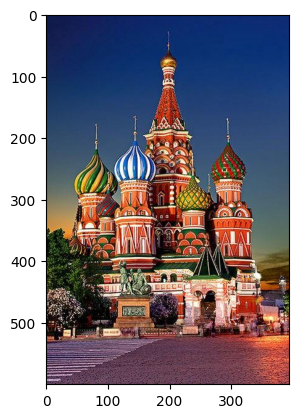

In [5]:
plt.imshow(img)

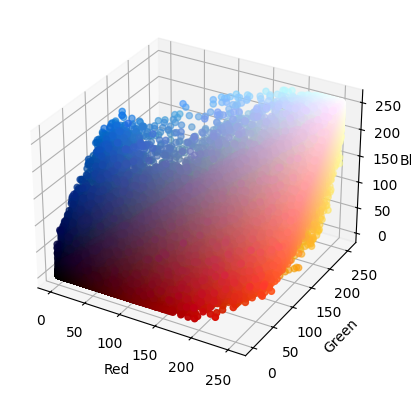

In [6]:
plot_image_colors(img)

## 4. Quantization
Use K-Means Clustering to perform color quantization on the image

In [21]:
# TODO: Quantize the colors in the image
# Try to create the image with only 16 colors
quant = convert_to_1D(img)

model = KMeans(n_clusters=16, random_state=5)


# Train the model
model = model.fit(quant)
model.cluster_centers_ 
model.labels_

new_img = np.ndarray(quant.shape)
# new_img = []
for x in range(len(quant)):
    new_img[x] = model.cluster_centers_[model.labels_[x]]



In [23]:
# TODO: Display the compressed image
img_comp = convert_to_2D(new_img)

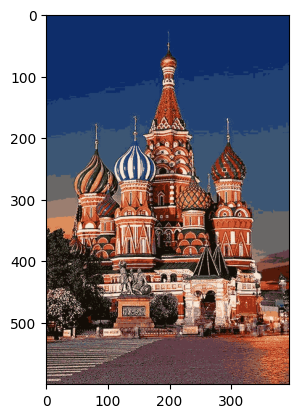

In [24]:
# TODO: Plot the new colors
plt.imshow(img_comp)

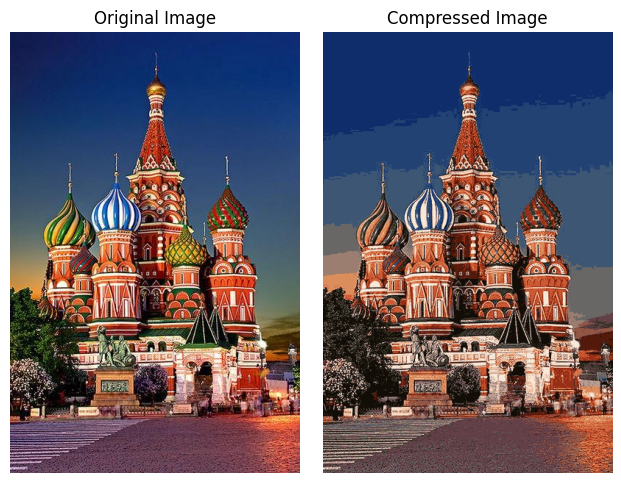

In [25]:
# TODO: Plot the image comparisons
plot_image_comparisons(img, img_comp)
